In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

In [7]:
data = pd.read_csv('Brain Tumor.csv')
data.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [8]:
data.columns

Index(['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'],
      dtype='object')

In [9]:
data['Class'].value_counts()

0    2079
1    1683
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

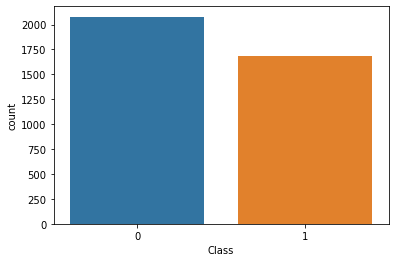

In [10]:
sns.countplot(data['Class'])

In [12]:
paths = []
main_path = ("Brain Tumor")
for files in os.listdir(main_path):
    paths.append( os.path.join(main_path,files))

In [13]:
paths[0:5]

['Brain Tumor/Brain Tumor\\Image1.jpg',
 'Brain Tumor/Brain Tumor\\Image10.jpg',
 'Brain Tumor/Brain Tumor\\Image100.jpg',
 'Brain Tumor/Brain Tumor\\Image1000.jpg',
 'Brain Tumor/Brain Tumor\\Image1001.jpg']

In [14]:
pathes_dict={os.path.splitext(os.path.basename(x))[0]: x for x in paths}
data['pathes'] = data['Image'].map(pathes_dict.get)

In [15]:
data.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,pathes
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155,Brain Tumor/Brain Tumor\Image1.jpg
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155,Brain Tumor/Brain Tumor\Image2.jpg
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155,Brain Tumor/Brain Tumor\Image3.jpg
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155,Brain Tumor/Brain Tumor\Image4.jpg
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155,Brain Tumor/Brain Tumor\Image5.jpg


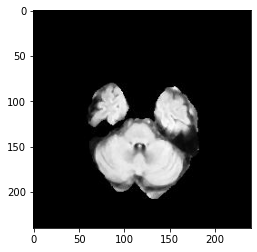

In [16]:
im = imread('Brain Tumor/Image916.jpg')
plt.imshow(im)


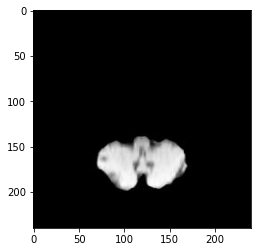

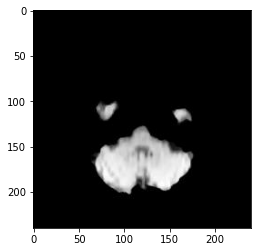

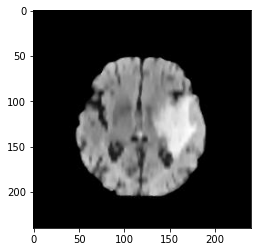

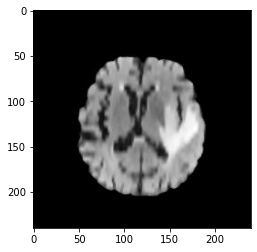

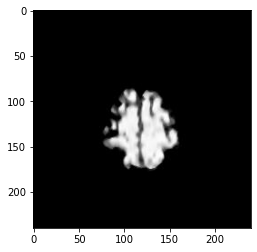

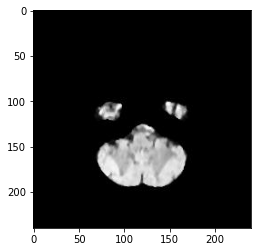

In [17]:
for x in range (0 ,6):
    img = imread(data['pathes'][x])
    plt.imshow(img)
    plt.show()
    

In [18]:
from PIL.Image import open
im_array = np.asarray(open('Brain Tumor/Image916.jpg').resize((224,224)))
im_array.shape

(224, 224, 3)

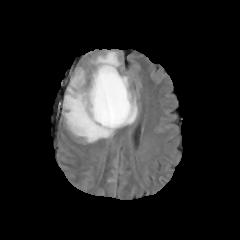

In [19]:
open("Brain Tumor/Image956.jpg")

In [20]:

data['pixels']=data['pathes'].map(lambda x:np.asarray(open(x).resize((224,224))))

In [21]:
#data.head()

In [22]:
#b = data['pixels'][2].astype(np.float32)

In [23]:
#b

In [24]:
#i = image.img_to_array(b)

In [25]:
#i

In [26]:
#tf.keras.applications.resnet50.preprocess_input(i)

In [27]:
img_list = []
for i in range(0,len(data)):
    brain_image = data['pixels'][i].astype(np.float32)
    img_array = image.img_to_array(brain_image)
    img_list.append(tf.keras.applications.resnet50.preprocess_input(img_array))
    

X = np.array(img_list)

print(X.shape)

(3762, 224, 224, 3)


In [28]:
y = np.array(data.Class)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


print('Shape of the X_train :'+' '+str(X_train.shape))
print('Size of the X_train :'+' '+str(X_train.shape[0]))
print('Shape of the X_test :'+' '+str(X_test.shape))
print('Size of the X_test:'+' '+str(X_test.shape[0]))

Shape of the X_train : (3009, 224, 224, 3)
Size of the X_train : 3009
Shape of the X_test : (753, 224, 224, 3)
Size of the X_test: 753


In [26]:
model= ResNet50(input_shape = (224,224,3),weights='imagenet',include_top=False)



94781440/94765736 [==============================] - 1s 0us/step


In [27]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [28]:
al1 = tf.keras.layers.GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(al1)
al2 = Dropout(0.5)(fc1)
fc2 = Dense(1,activation='sigmoid',name='preds')(al2)

In [29]:
Tumor_Model = Model(inputs = model.input,outputs = fc2)

In [30]:
Tumor_Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [31]:
#from keras.utils.vis_utils import plot_model

In [32]:
#plot_model(Tumor_Model)
#plt.savefig("img")

In [33]:
from tensorflow.keras.optimizers import Adam

In [34]:
Tumor_Model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
for i in range(len(Tumor_Model.layers)):
  print(i,Tumor_Model.layers[i])

0 <keras.engine.input_layer.InputLayer object at 0x7f5318683410>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7f5318683c90>
2 <keras.layers.convolutional.Conv2D object at 0x7f53182eb350>
3 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5317a7e650>
4 <keras.layers.core.activation.Activation object at 0x7f53183db450>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7f53100cecd0>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f53100e0510>
7 <keras.layers.convolutional.Conv2D object at 0x7f53100ebed0>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f53100789d0>
9 <keras.layers.core.activation.Activation object at 0x7f5310082810>
10 <keras.layers.convolutional.Conv2D object at 0x7f5310078ad0>
11 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f5310086410>
12 <keras.layers.core.activation.Activation object at 0x7f5310098710>
13 <keras.layers.convolutional.Conv2D object at 

In [36]:
for ix in range(149):
  Tumor_Model.layers[ix].trainable = False

In [37]:
Tumor_Model.compile(optimizer=Adam(learning_rate = 0.0001),loss = 'binary_crossentropy',metrics = ['accuracy'])

In [38]:
Tumor_Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [39]:
hist = Tumor_Model.fit(X_train,y_train,shuffle=True,validation_split=0.25,batch_size=40,epochs=5)

Epoch 1/5
57/57 [==============================] - 28s 246ms/step - loss: 0.3132 - accuracy: 0.8666 - val_loss: 0.2581 - val_accuracy: 0.9124
Epoch 2/5
57/57 [==============================] - 11s 188ms/step - loss: 0.1084 - accuracy: 0.9614 - val_loss: 0.2482 - val_accuracy: 0.9309
Epoch 3/5
57/57 [==============================] - 11s 188ms/step - loss: 0.0478 - accuracy: 0.9845 - val_loss: 0.3842 - val_accuracy: 0.9163
Epoch 4/5
57/57 [==============================] - 11s 189ms/step - loss: 0.0381 - accuracy: 0.9867 - val_loss: 0.1932 - val_accuracy: 0.9389
Epoch 5/5
57/57 [==============================] - 11s 190ms/step - loss: 0.0274 - accuracy: 0.9920 - val_loss: 0.1484 - val_accuracy: 0.9668


In [40]:
Tumor_Model.save('model.h5')
print('saved!!')

saved!!


In [41]:
loss = hist.history['loss']
acc = hist.history['accuracy']

Text(0.5, 1.0, 'Trainning Loss')

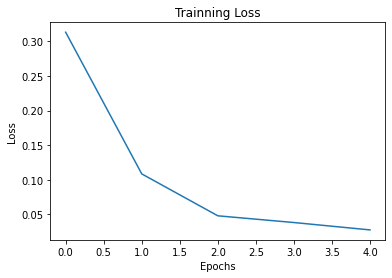

In [44]:
epoch = np.arange(5)
plt.plot(epoch,loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Trainning Loss')

Text(0.5, 1.0, 'Trainning Accuracy')

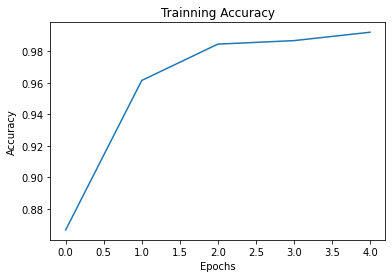

In [45]:
epoch = np.arange(5)
plt.plot(epoch,acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Trainning Accuracy')

In [1]:
from keras.models import load_model

In [30]:
TumorModel = load_model('model.h5')

In [31]:
test_score = TumorModel.evaluate(X_test,y_test)
test_score

24/24 [==============================] - 61s 2s/step - loss: 0.1664 - accuracy: 0.9602


[0.16642457246780396, 0.9601593613624573]

In [34]:
print("Test Accuracy is",test_score[1]) 
print("Test Loss is",test_score[0])


Test Accuracy is 0.9601593613624573
Test Loss is 0.16642457246780396
